<a href="https://colab.research.google.com/github/piroo8/Aps360/blob/nicks-stuff/RNN_Primary_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install emoji --upgrade

In [4]:
import pandas as pd
import numpy as np
from string import punctuation
import emoji
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


<ipython-input-5-2ebe866f59cc>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(train_path, names=headers, error_bad_lines=False)


[Text(0.5, 0, 'Labels')]

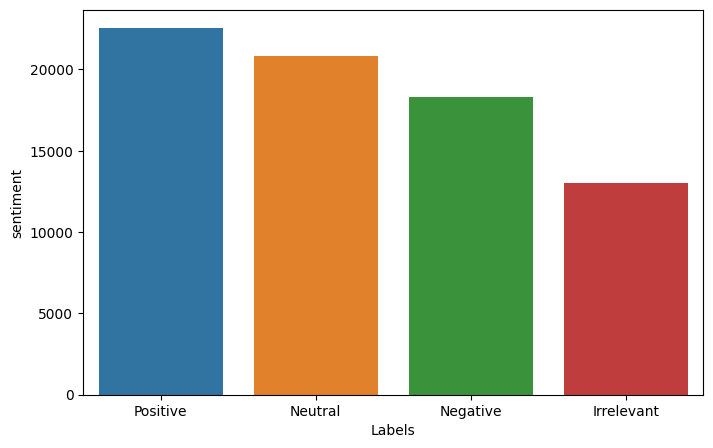

In [5]:
train_path = "/content/drive/MyDrive/Colab Notebooks/project/twitter_sentiment/twitter_training.csv"
headers = ["id", "sentiment source", "sentiment", "sentiment text"]
# use pathlib to load path
df = pd.read_csv(train_path, names=headers, error_bad_lines=False)

fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x=df.sentiment.unique(),y=df.sentiment.value_counts());
ax.set(xlabel='Labels')
# Note: The label distribution is not even!

In [6]:
# Loading the data
train_path = "/content/drive/MyDrive/Colab Notebooks/project/twitter_sentiment/twitter_training.csv"
val_path = "/content/drive/MyDrive/Colab Notebooks/project/twitter_sentiment/twitter_validation.csv"
# Note: ideally data doesnt have column headers but we add them to easy manipulation
headers = ["id", "sentiment_source", "sentiment", "sentiment_text"]
train_df = pd.read_csv(train_path, names=headers)
val_df = pd.read_csv(val_path, names=headers)
#train_df.shape #(74682,4)
#val_df.shape #(1000,4)
#train_df[:]
#val_df[:]

# Cleaning the data

# normalizing the data to be all lower case
def lowercase_all(df,column):
  df_col = df[column]
  df_col = df[column].str.lower()
  return df_col

train_df['sentiment_source'] = lowercase_all(train_df, 'sentiment_source')
train_df['sentiment'] = lowercase_all(train_df, 'sentiment')
train_df['sentiment_text'] = lowercase_all(train_df, 'sentiment_text')
val_df['sentiment_source'] = lowercase_all(val_df, 'sentiment_source')
val_df['sentiment'] = lowercase_all(val_df, 'sentiment')
val_df['sentiment_text'] = lowercase_all(val_df, 'sentiment_text')

# Removing all NaN/null values

#print(train_df['Tweet'].isna().sum())
# there are 686 empty tweets in the train data set that we will remove
#print(val_df['Tweet'].isna().sum())
# there are 0 empty tweets in the validation data set

# deleting the empty rowing in the training data set
train_df.dropna(inplace=True, axis='index')
val_df.dropna(inplace=True, axis='index')

#train_df.shape #(73996, 4)
#val_df.shape #(1000,4)

# convering Labels from string to int

mapping = {'irrelevant': 0, 'negative': 1, 'neutral': 2, 'positive': 3}
train_df.replace({'sentiment': mapping}, inplace=True)
val_df.replace({'sentiment': mapping}, inplace=True)
#train_df[:]
#val_df[:]

#removing punctuation
train_df['sentiment_text'] = train_df['sentiment_text'].str.replace('[^\w\s]','')
train_df['sentiment_text'].head()
val_df['sentiment_text'] = val_df['sentiment_text'].str.replace('[^\w\s]','')
val_df['sentiment_text'].head()

# removing the @mentions in the text
def remove_usernames_links(tweet):
  tweet = re.sub('@[^\s]+','',tweet)
  tweet = re.sub('@ [^\s]+','',tweet)
  tweet = re.sub('http[^\s]+','',tweet)
  tweet = re.sub('https[^\s]+','',tweet)
  return tweet
train_df['sentiment_text'] = train_df['sentiment_text'].apply(remove_usernames_links)
val_df['sentiment_text'] = val_df['sentiment_text'].apply(remove_usernames_links)
# there are some urls and links we couldnt get rid of as there were a variety of them and then it became an individual case based processing
# which is extremely time consuming and out of the scope

# removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
train_df['sentiment_text'] = train_df['sentiment_text'].apply(lambda x: remove_emoji(x))
val_df['sentiment_text'] = val_df['sentiment_text'].apply(lambda x: remove_emoji(x))
train_df['sentiment_text'] = train_df['sentiment_text'].apply(lambda s: emoji.replace_emoji(s, ''))
val_df['sentiment_text'] = val_df['sentiment_text'].apply(lambda s: emoji.replace_emoji(s, ''))

#train_df[:5]
#val_df[:5]

# Lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
train_df['sentiment_text'] = train_df['sentiment_text'].apply(space)
train_df.head(20)
val_df['sentiment_text'] = val_df['sentiment_text'].apply(space)
val_df.head(20)

train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/project/twitter_sentiment/train_data.csv')
val_df.to_csv('/content/drive/MyDrive/Colab Notebooks/project/twitter_sentiment/val_data.csv')
# train_df[:5]

<ipython-input-6-2a7205ccf9bc>:51: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['sentiment_text'] = train_df['sentiment_text'].str.replace('[^\w\s]','')
<ipython-input-6-2a7205ccf9bc>:53: FutureWarning: The default value of regex will change from True to False in a future version.
  val_df['sentiment_text'] = val_df['sentiment_text'].str.replace('[^\w\s]','')


In [7]:
train_df[:5]

,id,sentiment_source,sentiment,sentiment_text
0,2401,borderlands,3,I m get on borderland and I will murder you all
1,2401,borderlands,3,I be come to the border and I will kill you all
2,2401,borderlands,3,I m get on borderland and I will kill you all
3,2401,borderlands,3,I m come on borderland and I will murder you all
4,2401,borderlands,3,I m get on borderland 2 and I will murder you ...


In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token = '<nothing>')
tokenizer.fit_on_texts(train_df['sentiment_text'])
tokenizer.fit_on_texts(val_df['sentiment_text'])
#tokenizer.word_index
#tokenizer.word_counts
#tokenizer.document_count # 73996 as we expected and calculated during cleaning
from keras.utils import pad_sequences
# add a row of index sequences
train_sequences = tokenizer.texts_to_sequences(train_df['sentiment_text'])
val_sequences = tokenizer.texts_to_sequences(val_df['sentiment_text'])
# adding padding to make all sequences the same length
train_sequences = pad_sequences(train_sequences,padding='post')
val_sequences = pad_sequences(val_sequences,padding='post')

# all data preprocessing is complete and now we are ready with our input data!

In [81]:
# converting the labes to One-Hot-Encoding
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
train_df['sentiment'][:5]
from keras.utils import to_categorical
num_classes = 3
train_df['sentiment'] = to_categorical(train_df['sentiment'], num_classes)
val_df['sentiment'] = to_categorical(val_df['sentiment'], num_classes)

x_train = train_sequences
x_val = val_sequences
y_train = train_df['sentiment']
y_val = val_df['sentiment']


save_xtrain = x_train
x_train = torch.tensor(x_train)
x_val = torch.tensor(x_val)
y_tensor_train = []
y_tensor_val = []


for entry in train_df['sentiment']:
  y_tensor_train.append(entry)
for entry in val_df['sentiment']:
  y_tensor_val.append(entry)
y_tensor_train = torch.tensor(y_tensor_train)
y_tensor_val = torch.tensor(y_tensor_val)

train_dataset = TensorDataset(x_train, y_tensor_train)
val_dataset = TensorDataset(x_val, y_tensor_val)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 32, shuffle=True)


In [83]:
y_tensor_train.size()

torch.Size([73996])

In [12]:
from collections import Counter
# Count all the words using Counter Method
all_text = " ".join(train_df["sentiment_text"])
all_words = all_text.split()
all_filtered = []
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
len(sorted_words)

35895

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim

class SentimentRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SentimentRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Define the fully connected layer for sentiment prediction
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
      # Initialize hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device).to(self.lstm.weight_ih_l0.dtype)
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device).to(self.lstm.weight_ih_l0.dtype)

      # Convert input tensor to the same data type as the LSTM weights
      x = x.to(self.lstm.weight_ih_l0.dtype)
      out, _ = self.lstm(x, (h0, c0))

      # Extract the output of the last time step
      out = out[:, -1, :]

      # Pass the output through the fully connected layer for sentiment prediction
      out = self.fc(out)

      return out

def train(model, train_dataloader, learning_rate):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()

    epochs = 10
    for epoch in range(epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for batch in train_dataloader:
            # Move the batch to the device
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            # Reshape the inputs to match the expected shape
            inputs = inputs.unsqueeze(1)  # Add an extra dimension for sequence length

            # Clear the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Reshape the outputs and labels
            outputs = outputs.view(-1, outputs.size(-1))
            labels = labels.view(-1)

            # Convert labels to torch.long
            labels = labels.to(torch.long)

            # Calculate the loss
            loss = loss_fn(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update the running loss
            running_loss += loss.item()

            # Calculate the number of correct predictions
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        # Calculate the training accuracy
        training_accuracy = correct_predictions / total_predictions

        # Print the average loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_dataloader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss}, Accuracy: {training_accuracy * 100}%")

In [79]:
first_model = SentimentRNN(166,64,1, 3)
train(first_model, train_loader, 0.0001)

Epoch [1/10], Loss: 1.0551956411156365, Accuracy: 45.66057624736472%
Epoch [2/10], Loss: 0.9238282919342364, Accuracy: 69.9618898318828%
Epoch [3/10], Loss: 0.8261184740056221, Accuracy: 78.27720417319856%
Epoch [4/10], Loss: 0.7535029277881914, Accuracy: 80.85166765771122%
Epoch [5/10], Loss: 0.700336755327059, Accuracy: 81.8530731390886%
Epoch [6/10], Loss: 0.6608798029332051, Accuracy: 82.20038921022757%
Epoch [7/10], Loss: 0.6315634409766975, Accuracy: 82.36526298718849%
Epoch [8/10], Loss: 0.6102219905963564, Accuracy: 82.45580842207687%
Epoch [9/10], Loss: 0.5934559882357169, Accuracy: 82.49229688091249%
Epoch [10/10], Loss: 0.5807843588540629, Accuracy: 82.50716254932699%


In [91]:
next(iter(train_loader))

[tensor([[  29, 2076,   18,  ...,    0,    0,    0],
         [ 587, 6059, 2972,  ...,    0,    0,    0],
         [ 366,    4,   22,  ...,    0,    0,    0],
         ...,
         [ 482,    0,    0,  ...,    0,    0,    0],
         [  12,    4,   52,  ...,    0,    0,    0],
         [   2,  441,   45,  ...,    0,    0,    0]], dtype=torch.int32),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])]